In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/nadiiahryhoruk/Desktop/results.csv')

In [3]:
df.head(10)

,company_name,high_price_hour,hour_of_day,ts
0,BYND,37.80,9,2022-05-02 09:55:00-04:00
1,BYND,37.99,10,2022-05-02 10:30:00-04:00
2,BYND,37.59,11,2022-05-02 11:30:00-04:00
3,BYND,37.33,12,2022-05-02 12:20:00-04:00
4,BYND,36.57,13,2022-05-02 13:05:00-04:00
5,BYND,36.95,14,2022-05-02 14:50:00-04:00
6,BYND,38.33,15,2022-05-02 15:55:00-04:00
7,BYND,24.37,16,2022-05-20 16:00:00-04:00
8,DDOG,123.33,9,2022-05-02 09:55:00-04:00
9,DDOG,122.58,10,2022-05-02 10:00:00-04:00


# Highest Stock Price at the First Trading Hour

[Text(0.5, 1.0, 'Highest Stock Price at the First Trading Hour'),
 Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Highest Stock Price')]

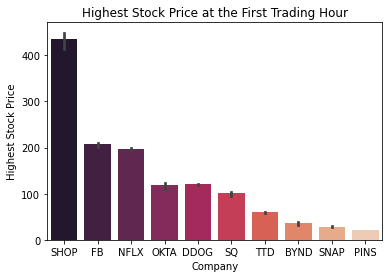

In [4]:
dfHour = df
sns.barplot(x = 'company_name',
            y = 'high_price_hour',
            data = dfHour.sort_values(by=['high_price_hour'],
                                      ascending=False).reset_index(drop=True),
            palette = "rocket"
           ).set(title = 'Highest Stock Price at the First Trading Hour',
                 xlabel='Company', 
                 ylabel='Highest Stock Price')

# Highest Hourly Stock Price Trend

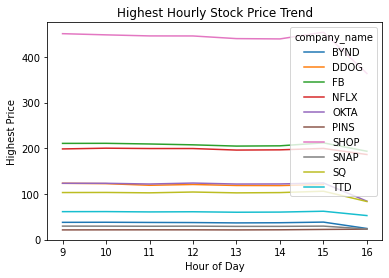

In [5]:
sns.lineplot(data = df,
             x = "hour_of_day",
             y = "high_price_hour",
             hue = "company_name",
            ).set(title = 'Highest Hourly Stock Price Trend',
                  xlabel='Hour of Day',
                  ylabel='Highest Price');

# Comparison of Opening and Closing Price

[Text(0.5, 1.0, 'Comparison of Highest Opening and Closing Price'),
 Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Highest Stock Price')]

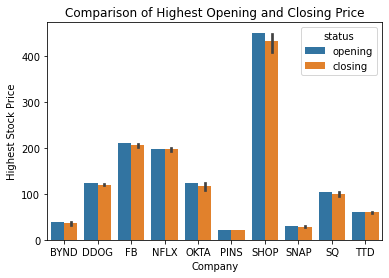

In [6]:
df.query('hour_of_day == 9 | hour_of_day == 15')
df['status'] = np.where(df['hour_of_day'] == 9, 'opening', 'closing')
sns.barplot(data=df.reset_index(drop=True), 
            x="company_name", 
            y="high_price_hour", 
            hue='status'
            ).set(title='Comparison of Highest Opening and Closing Price',
                  xlabel ="Company",
                  ylabel="Highest Stock Price")

# Average Highest Stock Price

[Text(0.5, 1.0, 'Average Highest Stock Price'),
 Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Average Stock Price')]

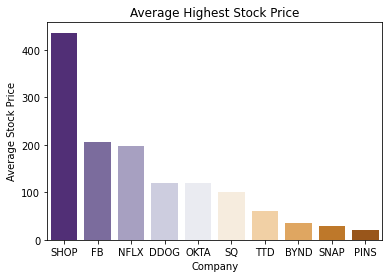

In [7]:
dfAvg = df.groupby('company_name').mean()['high_price_hour'].reset_index(name='average_price')
sns.barplot(x='company_name', 
            y='average_price',
            data=dfAvg.sort_values(by=['average_price'], 
                                ascending=False).reset_index(drop=True),
            palette="PuOr_r"
            ).set(title='Average Highest Stock Price',
                  xlabel ="Company",
                  ylabel="Average Stock Price")